In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from google.colab import files
data = files.upload()

Saving CropDataset.csv to CropDataset.csv


In [2]:
df= pd.read_csv("CropDataset.csv")
df.head()

,Avg Temp,Humidity %,Rainfall (mm),Average pH,N,P,K,OC,Crop Type
0,28.0,73.0,1094,7.85,10.0,12.0,9.0,6.0,Paddy
1,22.0,81.0,2782,4.00,NaN,NaN,NaN,NaN,Rice
2,23.0,77.0,2818,4.00,63.0,92.0,65.0,42.0,Tea
3,25.5,62.0,1256,6.95,2496.0,2015.0,2331.0,2133.0,Wheat
4,27.0,59.0,1247,6.68,12882.0,11239.0,9319.0,7184.0,Paddy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Avg Temp       30 non-null     float64
 1   Humidity %     30 non-null     float64
 2   Rainfall (mm)  30 non-null     int64  
 3   Average pH     30 non-null     float64
 4   N              29 non-null     float64
 5   P              29 non-null     float64
 6   K              29 non-null     float64
 7   OC             29 non-null     float64
 8   Crop Type      30 non-null     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 2.2+ KB


In [4]:
#replacing null values with median
df['Avg Temp'].fillna((df['Avg Temp'].median()), inplace=True)
df['Humidity %'].fillna((df['Humidity %'].median()), inplace=True)
df['Rainfall (mm)'].fillna((df['Rainfall (mm)'].median()), inplace=True)
df['Average pH'].fillna((df['Average pH'].median()), inplace=True)
df['N'].fillna((df['N'].median()), inplace=True)
df['P'].fillna((df['P'].median()), inplace=True)
df['K'].fillna((df['K'].median()), inplace=True)
df['OC'].fillna((df['OC'].median()), inplace=True)
labels = df["Crop Type"].unique()
df

,Avg Temp,Humidity %,Rainfall (mm),Average pH,N,P,K,OC,Crop Type
0,28.00,73.0,1094,7.85,10.0,12.0,9.0,6.0,Paddy
1,22.00,81.0,2782,4.00,525.0,1088.0,1167.0,1476.0,Rice
2,23.00,77.0,2818,4.00,63.0,92.0,65.0,42.0,Tea
3,25.50,62.0,1256,6.95,2496.0,2015.0,2331.0,2133.0,Wheat
4,27.00,59.0,1247,6.68,12882.0,11239.0,9319.0,7184.0,Paddy
5,27.50,76.0,3005,5.75,2822.0,2973.0,2017.0,2736.0,Paddy
6,27.50,55.0,1017,7.40,40.0,68.0,45.0,40.0,Cotton
7,24.70,49.0,617,6.95,8594.0,10785.0,8799.0,13512.0,Bajra
8,13.50,62.5,1251,4.00,14956.0,19990.0,17257.0,14113.0,Wheat
9,13.50,70.0,1011,4.00,3519.0,4537.0,7472.0,3748.0,Rice


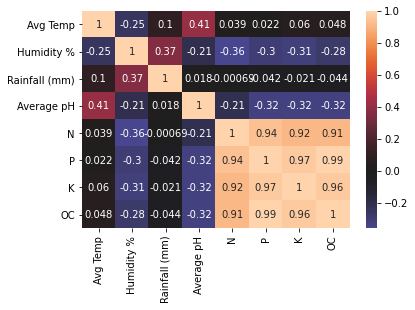

In [5]:
plt.figure()
sns.heatmap(df.corr(), center = 0, annot = True)
plt.show()

In [6]:
columns = df.columns[:-1]
columns

Index(['Avg Temp', 'Humidity %', 'Rainfall (mm)', 'Average pH', 'N', 'P', 'K',
       'OC'],
      dtype='object')

In [7]:
label_encoder = LabelEncoder()
x = df[columns]
y = label_encoder.fit_transform(df["Crop Type"])
print(x.shape, y.shape)
print(x)

(30, 8) (30,)
    Avg Temp  Humidity %  Rainfall (mm)  ...        P        K       OC
0      28.00        73.0           1094  ...     12.0      9.0      6.0
1      22.00        81.0           2782  ...   1088.0   1167.0   1476.0
2      23.00        77.0           2818  ...     92.0     65.0     42.0
3      25.50        62.0           1256  ...   2015.0   2331.0   2133.0
4      27.00        59.0           1247  ...  11239.0   9319.0   7184.0
5      27.50        76.0           3005  ...   2973.0   2017.0   2736.0
6      27.50        55.0           1017  ...     68.0     45.0     40.0
7      24.70        49.0            617  ...  10785.0   8799.0  13512.0
8      13.50        62.5           1251  ...  19990.0  17257.0  14113.0
9      13.50        70.0           1011  ...   4537.0   7472.0   3748.0
10     23.50        55.0           1237  ...   2003.0   2628.0   1986.0
11     24.00        63.0           1771  ...  87173.0  84880.0  87340.0
12     27.00        78.0           3055  ...   108

In [8]:
Crops = {}
for i in range(14):
    Crops[i] = label_encoder.inverse_transform([i])[0]
Crops

{0: 'Bajra',
 1: 'Cardamon',
 2: 'Cashew',
 3: 'Coffee',
 4: 'Cotton',
 5: 'Groundnut',
 6: 'Jute',
 7: 'Maize',
 8: 'Paddy',
 9: 'Potato',
 10: 'Rice',
 11: 'Sugarcane',
 12: 'Tea',
 13: 'Wheat'}

In [9]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [10]:
#KNN
error_rate = []
for i in range(1, 20):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    error_rate.append(np.mean(predictions != y_test))
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Minimum error: 0.875 at K = 1


In [11]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1))
knn_pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

Accuracy on Test Data: 12.5%


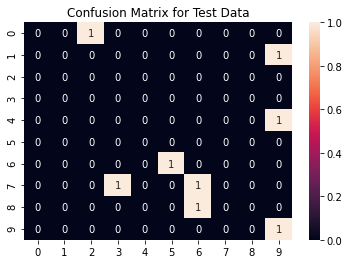

In [12]:
predictions = knn_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure()
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

Accuracy on Test Data: 25.0%


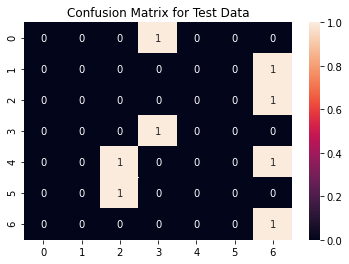

In [17]:
#RandomForest
rfr = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rfr.fit(x_train, y_train)

# Accuray On Test Data
predictions = rfr.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure()
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

Accuracy on Test Data: 0.0%


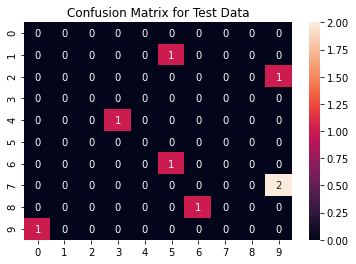

In [26]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

# Accuray On Test Data
dt_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, dt_pred)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure()
sns.heatmap(confusion_matrix(y_test, dt_pred), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

Accuracy on Test Data: 0.0%


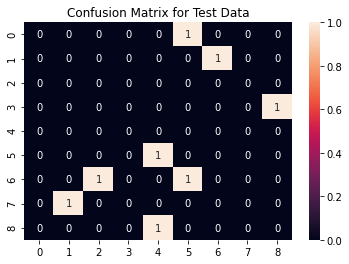

In [25]:
#SVM
from sklearn.svm import SVC
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

Accuracy on NaiveBayes: 25.0%


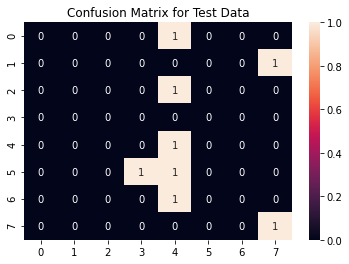

In [28]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)
y_pred_values = NaiveBayes.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_values)
print(f"Accuracy on NaiveBayes: {accuracy*100}%")
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_values), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()